In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

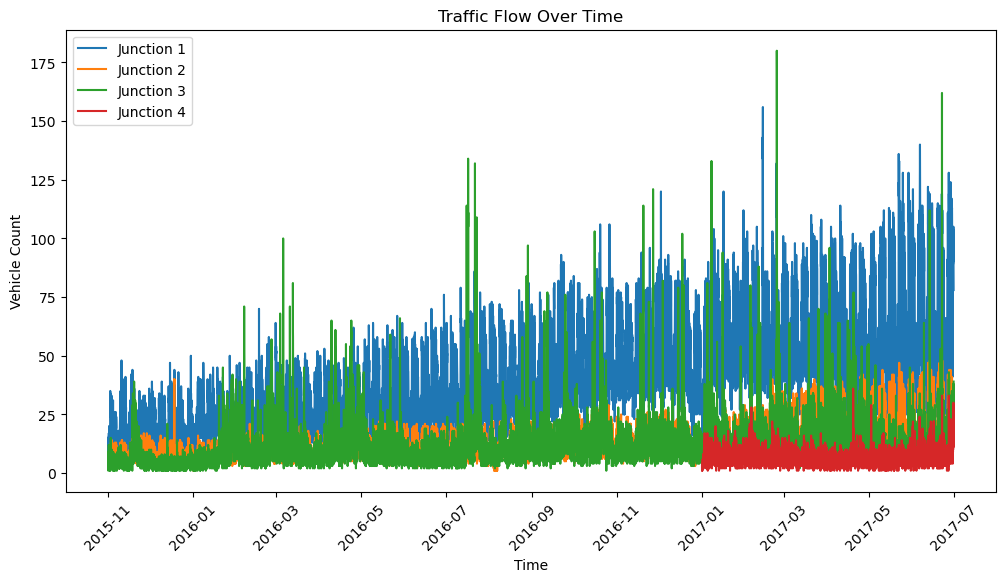

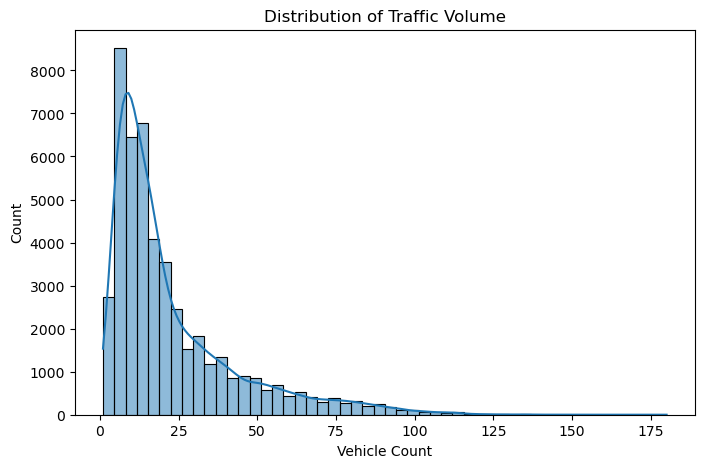

Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Summary Statistics:
                             DateTime      Junction      Vehicles            ID
count                          48120  48120.000000  48120.000000  4.812000e+04
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334  2.016330e+10
min              2015-11-01 00:00:00      1.000000      1.000000  2.015110e+10
25%              2016-04-16 01:45:00      1.000000      9.000000  2.016042e+10
50%              2016-09-30 03:30:00      2.000000     15.000000  2.016093e+10
75%              2017-02-25 16:00:00      3.000000     29.000000  2.017023e+10
max              2017-06-30 23:00:00      4.000000    180.000000  2.017063e+10
std                              NaN      0.966955     20.750063  5.944854e+06

Number of Unique Junctions: 4


In [19]:
# Load dataset
df = pd.read_csv(r"C:\Users\Bridget\Downloads\archive (1)\traffic.csv")

# Convert DateTime column to datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Unique junctions
unique_junctions = df["Junction"].nunique()

# Plot traffic trends over time
plt.figure(figsize=(12, 6))
for junction in df["Junction"].unique():
    subset = df[df["Junction"] == junction]
    plt.plot(subset["DateTime"], subset["Vehicles"], label=f"Junction {junction}")

plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.title("Traffic Flow Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot distribution of vehicle counts
plt.figure(figsize=(8, 5))
sns.histplot(df["Vehicles"], bins=50, kde=True)
plt.xlabel("Vehicle Count")
plt.title("Distribution of Traffic Volume")
plt.show()

# Print basic info
print("Missing Values:\n", missing_values)
print("\nSummary Statistics:\n", summary_stats)
print("\nNumber of Unique Junctions:", unique_junctions)



In [20]:
# Convert DateTime column to datetime format
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Handle missing values (drop rows with NaN values)
df.dropna(inplace=True)

# Drop unnecessary columns
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)  # Removing unique identifier if present

# Extract time-based features
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day
df["Month"] = df["DateTime"].dt.month
df["Weekday"] = df["DateTime"].dt.weekday  # 0=Monday, 6=Sunday

# Normalize numerical features (Vehicles count)
scaler = MinMaxScaler()
df["Vehicles"] = scaler.fit_transform(df[["Vehicles"]])

# Drop original DateTime column after feature extraction
df.drop(columns=["DateTime"], inplace=True)

# Display processed dataset
print("Preprocessed Dataset:\n", df.head())

# Save the cleaned dataset for model training
df.to_csv("processed_traffic_data.csv", index=False)
print("Preprocessed data saved as processed_traffic_data.csv")

Preprocessed Dataset:
    Junction  Vehicles  Hour  Day  Month  Weekday
0         1  0.078212     0    1     11        6
1         1  0.067039     1    1     11        6
2         1  0.050279     2    1     11        6
3         1  0.033520     3    1     11        6
4         1  0.044693     4    1     11        6
Preprocessed data saved as processed_traffic_data.csv
